In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# GlobalAiHub Deep Learning Bootcamp's final project
### This project is about sound detection. We have 10 different sound class that you can see below. Project wants us to convert the sounds into spectrograms and build a model with them. I got the spectrograms directly. You can see more information from https://urbansounddataset.weebly.com/urbansound8k.html

* 0 = air_conditioner 
* 1 = car_horn
* 2 = children_playing
* 3 = dog_bark
* 4 = drilling
* 5 = engine_idling
* 6 = gun_shot
* 7 = jackhammer
* 8 = siren
* 9 = street_music

# Data Preprocessing


In [2]:
datadir = "../input/globalaihubspectrogram/spectrograms"   #Our inputs directory
folds = ["0","1","2","3","4","5","6","7","8","9"]          #Name of  our folds

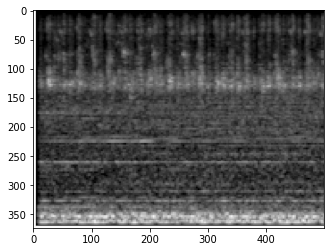

(374, 500)


In [3]:
for fold  in folds:
    path = os.path.join(datadir,fold)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap = "gray")
        plt.show()
        print(img_array.shape)
        break
    break
#This loop saves first picture and then breaks the loop because we did'nt start to work, we need to see what we have.

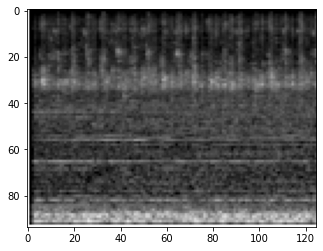

(94, 125)


In [4]:
IMG_SIZEX = 125
IMG_SIZEY = 94           #374,500 is a big for us. with 125,94 the picture will be 16 times smaller in terms of area


new_array = cv2.resize(img_array,(IMG_SIZEX,IMG_SIZEY))
plt.imshow(new_array,cmap = "gray")
plt.show()     #There is some distortion in the picture as we expect but its okey for us
print(new_array.shape)

In [5]:
data =[]    #We are ready to apply the previous processes to all pictures.

def create_data():
    for fold  in folds:
        path = os.path.join(datadir,fold)
        class_num = folds.index(fold)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array,(IMG_SIZEX,IMG_SIZEY))
            data.append([new_array,class_num])

create_data()

In [6]:
print(data[67]) #As you see, our list has 2 variable: (matrix of pic, class of a pic)

[array([[255,   0,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0],
       ...,
       [255,  54, 136, ..., 108, 101, 100],
       [255,  38,  89, ...,  42,  47,  56],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), 0]


In [7]:
import random     #We have to mix data. Bbcause first we added the class 0 then it continues as 1 then 2 3 4 ... 

random.shuffle(data)

In [8]:
for sample in data[:10]:
    print(sample[1])   #Its mixed now.

7
7
0
7
9
8
9
8
6
4


In [9]:
X = []    #Lets save variables as X and y
y = []
for features, label in data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1,IMG_SIZEX,IMG_SIZEY,1)
y = np.array(y)

X = X/255.0 #Normalize the data, All the values in our data are between 0 and 255, that is, if we divide all the data by 255, we will normalize it.

# Cnn Model


In [24]:
#CNN Model of Project
model = Sequential()

model.add(Conv2D(64,kernel_size =(3,3),strides = (1,1),padding ="same",activation ="relu",input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size =(3,3),strides = (1,1),padding ="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Flatten())

model.add(Dense(64,activation ="sigmoid"))
model.add(Dropout(0.5))

model.add(Dense(64,activation ="sigmoid"))
model.add(Dropout(0.5))

model.add(Dense(10,activation ="sigmoid"))


model.compile(loss ="sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])


y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


results = model.fit(X_train, y_train, batch_size=32,epochs=25, validation_split=0.13)

Epoch 1/25
202/202 [==============================] - 3s 12ms/step - loss: 2.2289 - accuracy: 0.1831 - val_loss: 1.9976 - val_accuracy: 0.2881
Epoch 2/25
202/202 [==============================] - 2s 10ms/step - loss: 2.0153 - accuracy: 0.2555 - val_loss: 1.7896 - val_accuracy: 0.4228
Epoch 3/25
202/202 [==============================] - 2s 10ms/step - loss: 1.7976 - accuracy: 0.3409 - val_loss: 1.5333 - val_accuracy: 0.5016
Epoch 4/25
202/202 [==============================] - 2s 10ms/step - loss: 1.5742 - accuracy: 0.4389 - val_loss: 1.3103 - val_accuracy: 0.6280
Epoch 5/25
202/202 [==============================] - 2s 10ms/step - loss: 1.3653 - accuracy: 0.5190 - val_loss: 1.1667 - val_accuracy: 0.6715
Epoch 6/25
202/202 [==============================] - 2s 11ms/step - loss: 1.1981 - accuracy: 0.5901 - val_loss: 0.9577 - val_accuracy: 0.7637
Epoch 7/25
202/202 [==============================] - 2s 10ms/step - loss: 1.0414 - accuracy: 0.6492 - val_loss: 0.8665 - val_accuracy: 0.7585

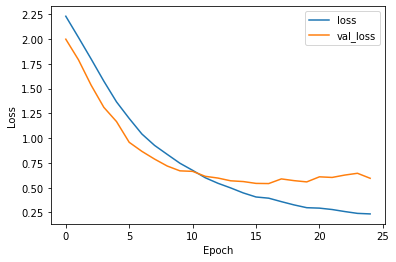

In [26]:
plt.plot(model.history.history["loss"], label = "loss")
plt.plot(model.history.history["val_loss"], label = "val_loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()

plt.show()


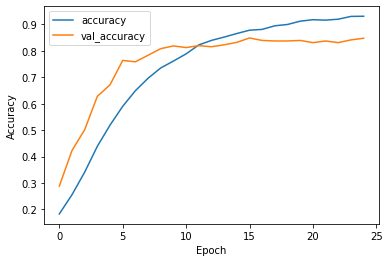

In [27]:
plt.plot(model.history.history["accuracy"], label = "accuracy")
plt.plot(model.history.history["val_accuracy"], label = "val_accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()

plt.show()